In [1]:
from algorithm import *

In [2]:
close = pd.read_csv('data/crypto_1m.csv', index_col='unix') # reads the closing prices of 129 stocks from the energy sector
close.shape # N closing prices, 17 different symbols

(703395, 17)

In [3]:
# choose a pair; refer to our heatmap to choose a cointegrated pair
# use 48 hours; first 24 for model fit, last 24 for model test
# Order matters slightly! Ideally order by how regression for adf test was ordered.
X = close['link'][-60*24*2:]
Y = close['xmr'][-60*24*2:]

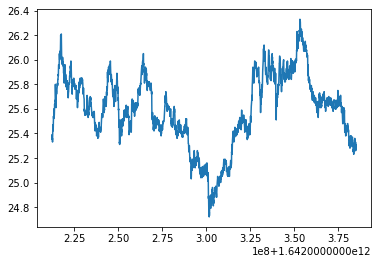

In [4]:
plt.plot(X)

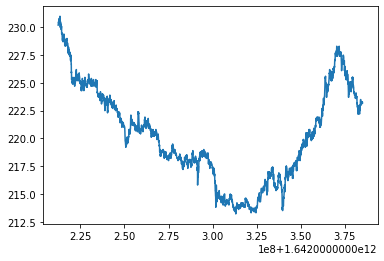

In [5]:
plt.plot(Y)

In [6]:
# params
z_crit = 2
z_sl = 1
z_tp = 1
window = 100
trade_size = 1000
trainval_split = len(X)//2
pause_after_sl = 10
# first half of split meets model assumptions by adf test (reject unit root = 1)
# first half of split is training set used to fit Y ~ X
# second half of split is validation set where trading occurs

In [7]:
pt = PairTrader(X, Y, z_crit, z_sl, z_tp, trainval_split, window, trade_size, pause_after_sl=pause_after_sl)

In [8]:
pt.fit_model()

In [9]:
account, logs = pt.test_model()

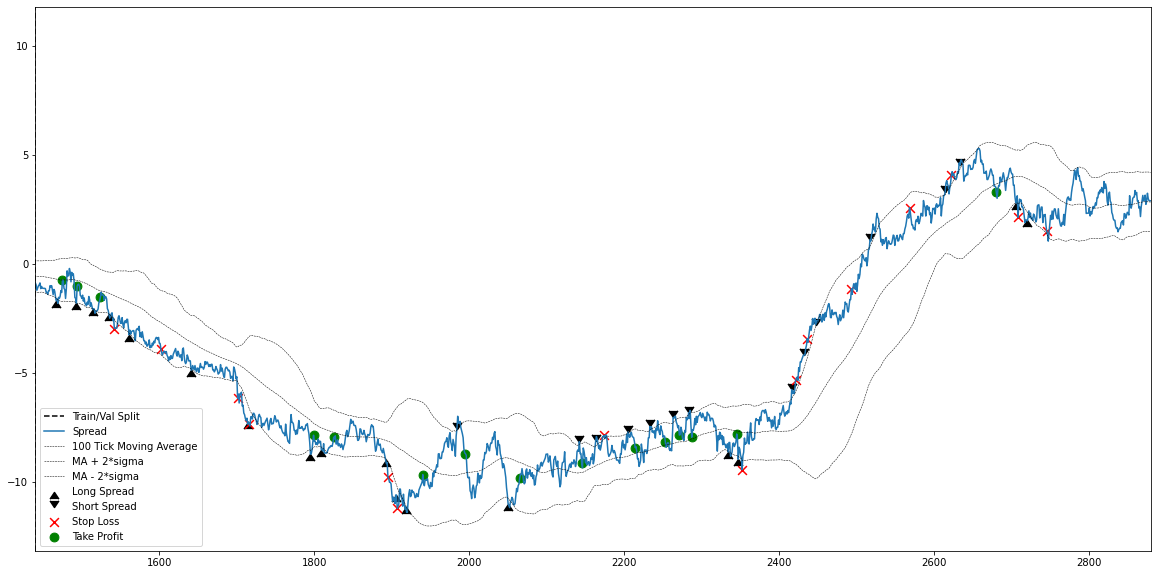

In [10]:
spread_plot = pt.plot('spread', zoom=True)

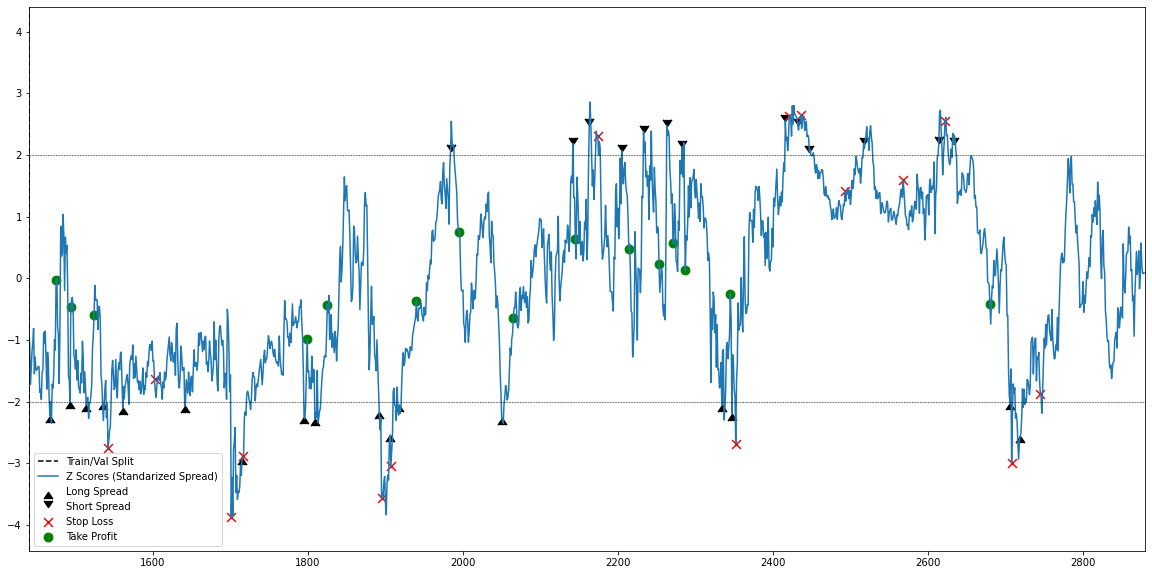

In [11]:
z_plot = pt.plot('z', zoom=True)

RESULTS

In [12]:
print('Cash Balance:', account.cash_balance)
print('Asset Balance:', account.asset_balance)
print('Total Balance:', account.total_balance)
print('Open Positions:', account.positions)
longs = [i[0] for i in logs if i[1]['status'] == 'L']
shorts = [i[0] for i in logs if i[1]['status'] == 'S']
stop_loss = [i[0] for i in logs if i[1]['status'] == 'SL']
take_profit = [i[0] for i in logs if i[1]['status'] == 'TP']
print('Losses:', len(stop_loss))
print('Profits:', len(take_profit))

Cash Balance: 1013.737830258844
Asset Balance: 0
Total Balance: 1013.737830258844
Open Positions: {}
Losses: 15
Profits: 15


In [13]:
print(str(((account.total_balance/trade_size)-1)*100)[0:4]+"%")
#Representing % gain from trade

1.37%
